# KBO Projections Exploratory Data Analysis

To this point, I haven't designated response variables. The project goal is to project a player's full season performance based off of their in-season performance to date, with the specific aim of projecting a worthy MVP-caliber offensive player to select as our spokesperson. So, to that end, I think worthy response variables from the dataset are the old-school triple crown: HR, BA, RBI.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('KBO_Projections_Data_Clean.csv')

## Data Profile Tables and Plots

In [3]:
df.columns

Index(['Name', 'Team', 'Batting Stance', 'Age', 'G', 'PA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Season'],
      dtype='object')

In [4]:
df.shape

(8025, 28)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8025.0,26.761745,4.503550,14.0,23.000,26.000,30.000,42.0
G,8025.0,60.682243,43.336389,1.0,19.000,57.000,101.000,144.0
PA,8025.0,183.471651,179.267829,1.0,23.000,116.000,329.000,672.0
AB,8025.0,160.153769,155.704330,1.0,20.000,102.000,285.000,600.0
R,8025.0,22.143551,24.935207,0.0,2.000,12.000,36.000,135.0
H,8025.0,42.822679,46.122351,0.0,4.000,24.000,74.000,201.0
2B,8025.0,7.392648,8.587969,0.0,0.000,4.000,12.000,47.0
3B,8025.0,0.806604,1.471728,0.0,0.000,0.000,1.000,17.0
HR,8025.0,3.973084,6.726314,0.0,0.000,1.000,5.000,56.0
RBI,8025.0,20.762243,25.398740,0.0,1.000,10.000,32.000,146.0


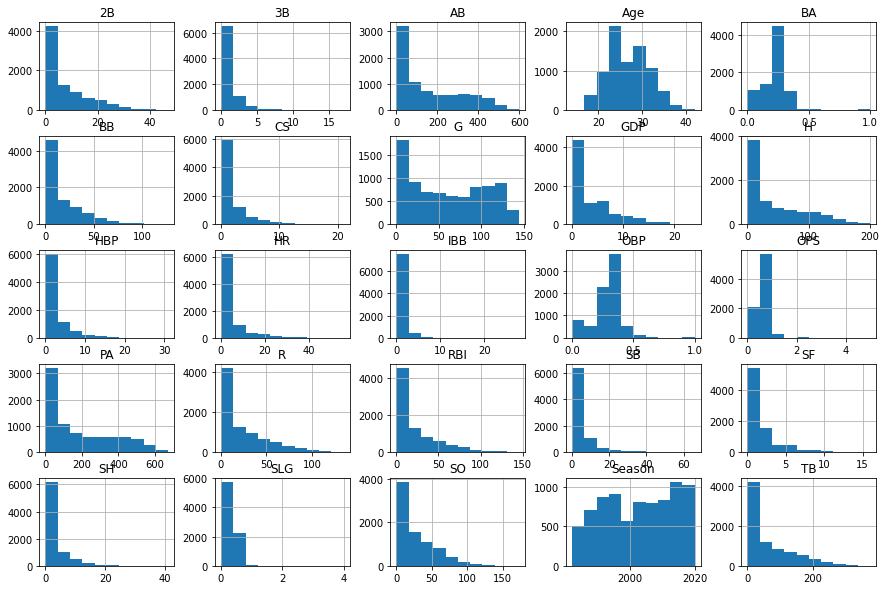

In [6]:
# variable histograms
_ = df.hist(bins=10, figsize=(15,10))

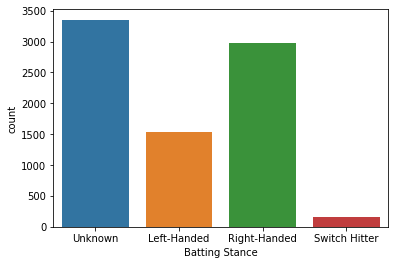

In [7]:
# Categorical Histogram for Batting Stance
df_cat = df[['Batting Stance']]
_ = sns.countplot(data=df_cat, x='Batting Stance')

I have consciously not shown categorical histograms for player name (we'll have thousands) or team (they will be varied based on how many seasons each team has played, but that distribution is not of particular interest here).

In [8]:
# subsetting df columns by scale to make boxplots more readable
xsmall = df[['BA', 'OBP', 'SLG', 'OPS']]
small = df[['3B', 'CS', 'SF']]
medium = df[['Age', '2B', 'HR', 'SB', 'GDP', 'HBP', 'SH', 'IBB']]
large = df[['G', 'PA', 'AB', 'R', 'H', 'RBI', 'BB', 'SO', 'TB']]

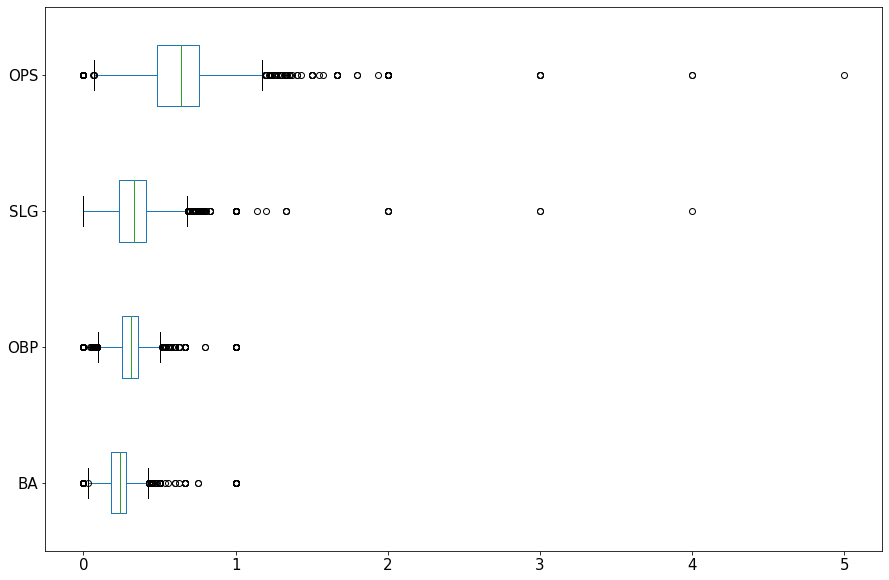

In [9]:
boxplot = xsmall.boxplot(figsize=(15,10), grid=False, vert=False, fontsize=15)

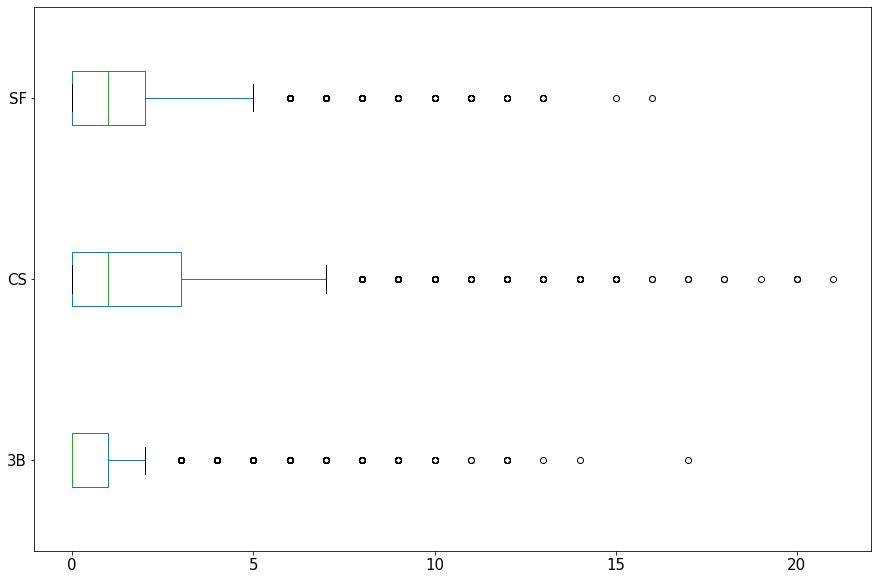

In [10]:
boxplot = small.boxplot(figsize=(15,10), grid=False, vert=False, fontsize=15)

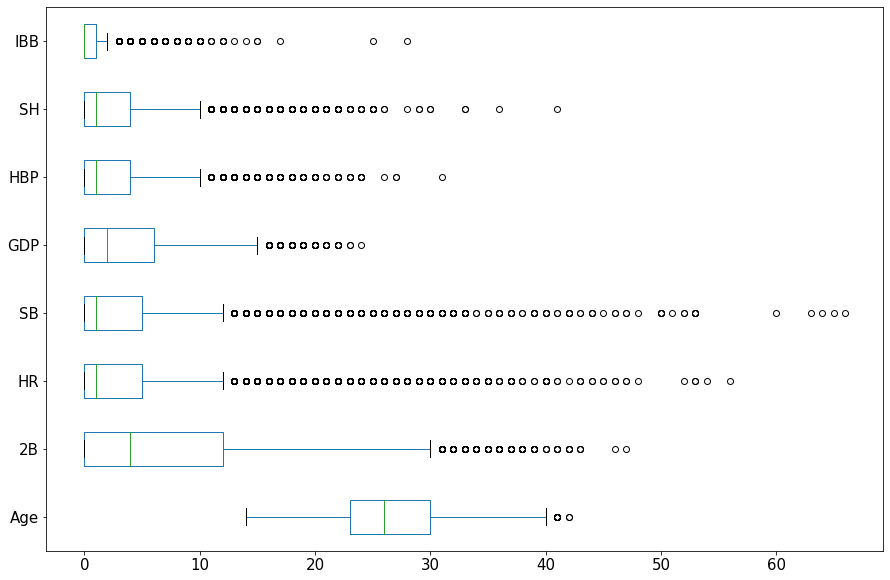

In [11]:
boxplot = medium.boxplot(figsize=(15,10), grid=False, vert=False, fontsize=15)

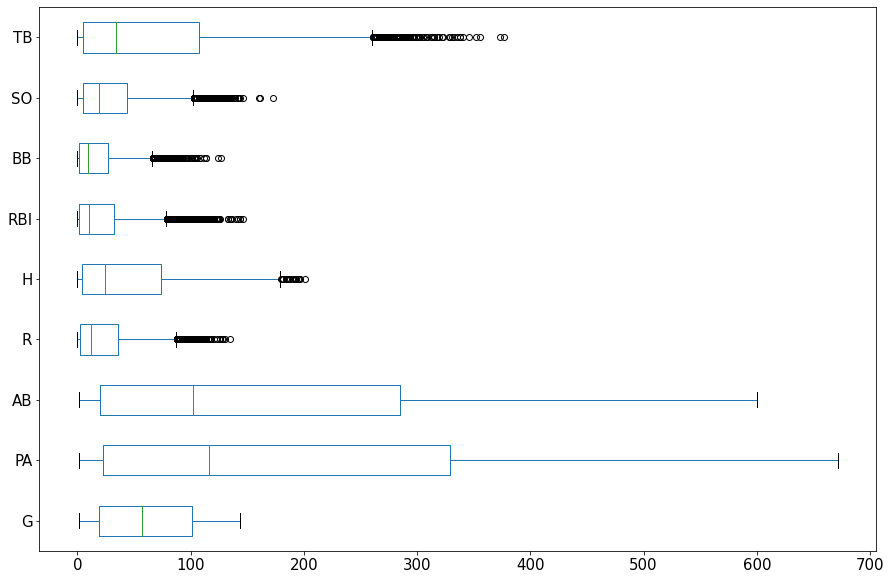

In [12]:
boxplot = large.boxplot(figsize=(15,10), grid=False, vert=False, fontsize=15)

Our box plots reflect that our dataset contains _many_ player's seasons with very few games (G) and/or at bats (AB). Subsequently, our counting statistics skew substantially lower, so totals from good players who play full seasons (high AB, high G) appear as outliers.

Because of this tendency, I filtered out the data set to only include player's seasons with 20+ AB (20 AB is also the 25th percentile for AB in our original df). The box plots actually turn out to look much the same when you do that, so I haven't included them here, and have left our dataset intact as is. These outliers are not a hiccup in our data--it is the nature of the distribution of many of our KBO player full season statistics.

## Explore Data Relationships

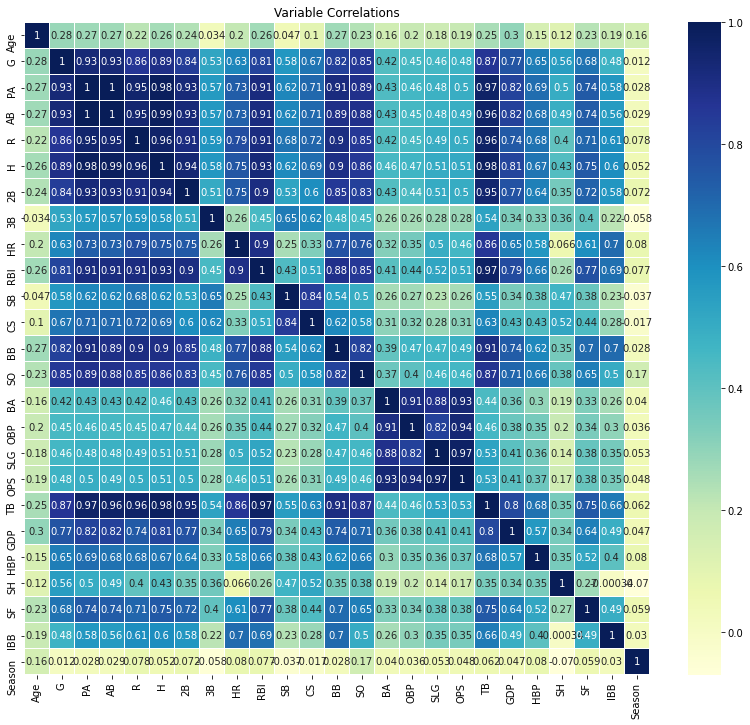

In [13]:
# correlation matrix heatmap
_ = plt.figure(figsize=(14,12))
_ = sns.heatmap(df.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
_ = plt.title("Variable Correlations")
plt.show()

Some of the features are definitely redundant. A lot of the features have sufficient colinearity to justify combining them into a single feature.

In [ ]:
# pair plots, subselected for visibility
_ = sns.pairplot(df, vars=['PA', 'R', 'HR', 'RBI', 'SB', 'BB', 'SO', 'OPS'])

## Identification of Features

So it's very clear now that a lot of the counting stats have colinearity because they accumulate based how many opportunites a player has. To make them more meaningful, I will transform them into_rates by dividing by PA. Additionally, PA and AB have nearly the same meaning, although PA is _slightly_ more informative, so I am dropping AB.

In [ ]:
# transform counting stats to_rates
counts = ['H', 'TB', 'R', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'GDP', 'HBP', 'SH', 'SF', 'IBB']
for column in counts:
    df[column] = df[column].divide(df['PA'])
    df.rename(columns={column : (column + "_rate")}, inplace=True)

In [ ]:
# remove AB in favor of PA
df.drop('AB', inplace=True, axis=1)

In [ ]:
# H_rate is the same thing as BA, and TB_rate is the same thing as SLG so we will drop them
df.drop(['H_rate', 'TB_rate'], axis=1, inplace=True)

In [ ]:
# identify colinear features to drop
# create correlation matrix excluding response variables
corr_matrix = df.drop(['BA', 'HR_rate', 'RBI_rate'], axis=1).corr().abs()
# isolate upper triangular of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# identify high correlation columns
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

In [ ]:
# Gs is functionally similar to PA, and OPS naturally collinear since it is simply OBP + SLG, so dropping them here
df.drop(['G', 'OPS'], axis=1, inplace=True)

In [ ]:
# updated correlation matrix heatmap
_ = plt.figure(figsize=(14,12))
_ = sns.heatmap(df.corr(), linewidths=.1, cmap="YlGnBu", annot=True, fmt=".2g")
_ = plt.title("Variable Correlations")
plt.show()

In [ ]:
# Dummies for Batting Stance
df_dummies = pd.concat([df,pd.get_dummies(df['Batting Stance'],prefix='Stance')],axis=1).drop(['Batting Stance'],axis=1)

# Batting Stance dummies correlation matrix heatmap
_ = plt.figure(figsize=(14,12))
_ = sns.heatmap(df_dummies.corr(), linewidths=.1, cmap="YlGnBu", annot=True, fmt=".1g")
_ = plt.title("Variable Correlations")
plt.show()

I will not be including the dummy variables for batting stance going forward because over a third of our observations (3,354) have Batting Stance 'Unknown'. But the _slight_ variations in correlation with RBI_rate, OBP, BA SO_rate, and GDP_rate depending on left- or right- handed batting stance are neat to observe!

# Notable (if Unsurprising) Correlations

Our correlations with our response variables are sometimes inherently entwined because one is a component of the other (slugging + HR_rate, OBP + BA, etc.). Regardless, the level of correlation is informative.

__0.62 Correlation__ Slugging vs. HR_rate

In [ ]:
fig = sns.jointplot(x='SLG', y='HR_rate', data=df, kind="reg", xlim=(0,0.75), ylim=(0,0.08))
_ = plt.suptitle('Slugging vs. HR_rate')

__0.91 Correlation__ OBP vs. BA

In [ ]:
fig = sns.jointplot(x='OBP', y='BA', data=df, kind="reg", xlim=(0,0.6), ylim=(0,0.45))
_ = plt.suptitle('OBP vs. BA')

__-0.44 Negative Correlation__ SO_rate vs. BA

In [ ]:
fig = sns.jointplot(x='SO_rate', y='BA', data=df, kind="reg", xlim=(0,0.4), ylim=(0,0.45))
_ = plt.suptitle('SO_rate vs. BA')

__0.4 Correlation__ 2B_rate vs. RBI_rate

In [ ]:
fig = sns.jointplot(x='2B_rate', y='RBI_rate', data=df, kind="reg", xlim=(0,0.1), ylim=(0,0.25))
_ = plt.suptitle('2B_rate vs. RBI_rate')

# Exploratory Multivariate Linear Regressions

In [ ]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
m = ols('BA ~ OBP + SO_rate + 0', df).fit()
print(m.summary())

In [ ]:
m = ols('HR_rate ~ SLG + OBP + 0', df).fit()
print(m.summary())

In [ ]:
m = ols('RBI_rate ~ SLG + OBP + 0', df).fit()
print(m.summary())

SLG seems to be a powerful predictive variable for HR_rate and RBI_rate. OBP is also a helpful contributor.
BA is easy to predict if we have OBP since the two are so closely intertwined.

# _k_-means Clustering

In [ ]:
from sklearn.cluster import KMeans
df_num = df.drop(['Name', 'Team', 'Batting Stance'], axis=1)
x = df_num.values

In [ ]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);

I don't know that I'll use k-means clustering in my modeling going forward, but I wanted to do it for thoroughness.